In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, cityblock

In [13]:
file=r"C:\Users\gowri\Desktop\Iris.csv"
data=pd.read_csv(file)

In [18]:
numeric_data=data.select_dtypes(include=[np.number])

In [20]:
data_cleaned=data.dropna()

In [24]:
data_filled=data.copy()
numeric_cols=data_filled.select_dtypes(include=[np.number]).columns
data_filled[numeric_cols]=data_filled[numeric_cols].fillna(data_filled[numeric_cols].mean())

In [30]:
scaler=StandardScaler()
data_std=pd.DataFrame(scaler.fit_transform(data_filled[numeric_cols]),columns=numeric_cols)

In [32]:
corr_matrix=data_std.corr()
print("CORRELATION MATRIX:")
print(corr_matrix)

CORRELATION MATRIX:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


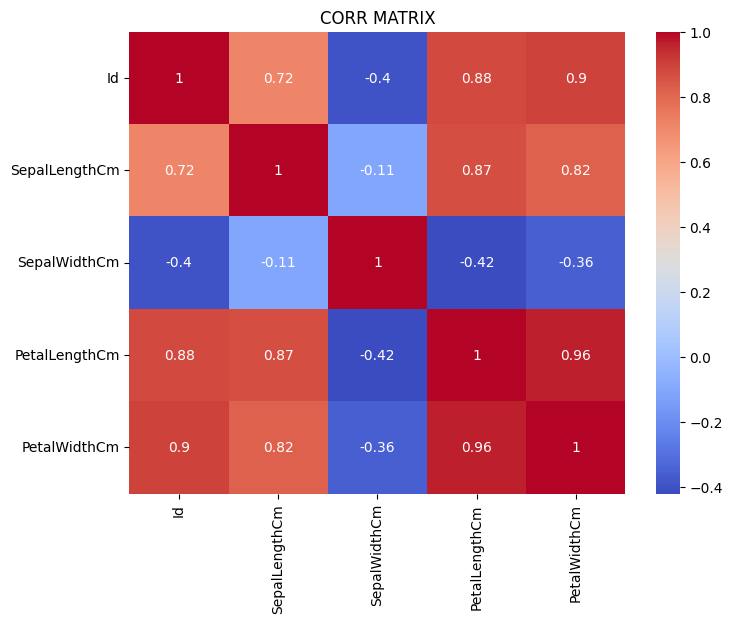

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("CORR MATRIX")
plt.show()

In [52]:
cov_matrix=data_std.cov()
print("COVARIANCE MATRIX:")
print(cov_matrix)

COVARIANCE MATRIX:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.006711       0.721486     -0.400398       0.888672   
SepalLengthCm  0.721486       1.006711     -0.110103       0.877605   
SepalWidthCm  -0.400398      -0.110103      1.006711      -0.423338   
PetalLengthCm  0.888672       0.877605     -0.423338       1.006711   
PetalWidthCm   0.905797       0.823443     -0.358937       0.969219   

               PetalWidthCm  
Id                 0.905797  
SepalLengthCm      0.823443  
SepalWidthCm      -0.358937  
PetalLengthCm      0.969219  
PetalWidthCm       1.006711  


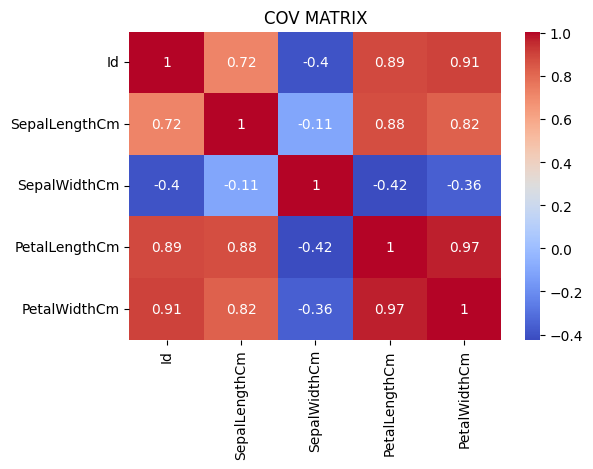

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(cov_matrix,annot=True, cmap='coolwarm')
plt.title("COV MATRIX")
plt.show()

In [56]:
cosine=cosine_similarity(data_std.iloc[:2,:])
print("Cosine Similarity:",cosine)

Cosine Similarity: [[1.         0.91380338]
 [0.91380338 1.        ]]


In [60]:
print("EUCLIDEAN DIST:",euclidean(data_std.iloc[0],data_std.iloc[1]))
print("Manhattan DIST:",cityblock(data_std.iloc[0],data_std.iloc[1]))
print("Supremum:",np.max(numeric_data.to_numpy))

EUCLIDEAN DIST: 1.1823465122996488
Manhattan DIST: 1.4224450905324992
Supremum: <bound method DataFrame.to_numpy of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]>


In [70]:
X=data_std.iloc[:,:-1]
y=data_filled.iloc[:,-1]

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
k_val=range(1,11)
scores=[]

for k in k_val:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5).mean()
    scores.append(score)

In [82]:
best_k=k_val[np.argmax(scores)]
knn_b=KNeighborsClassifier(n_neighbors=best_k)
knn_b.fit(X_train,y_train)
y_pred=knn_b.predict(X_test)
print("KNN Accuracy:",knn_b.score(X_test,y_test))

KNN Accuracy: 1.0


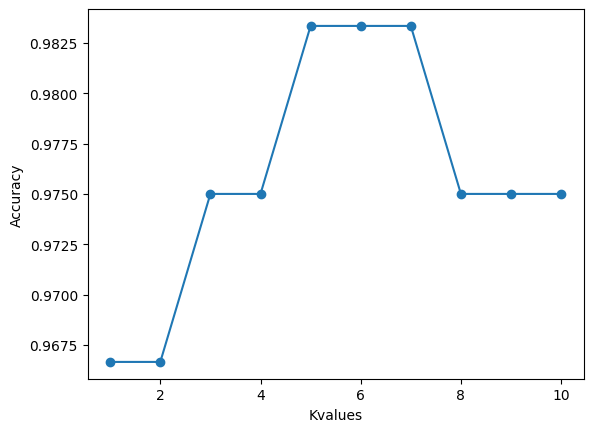

In [86]:
plt.plot(k_val,scores,marker='o')
plt.xlabel("Kvalues")
plt.ylabel("Accuracy")
plt.show()

In [96]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm

In [102]:
iso=IsolationForest(contamination=0.1,random_state=42)
iso_pred=iso.fit_predict(data_std)
data["IF"]=iso_pred

In [106]:
ee=EllipticEnvelope(contamination=0.09,random_state=42)
ee_pred=ee.fit_predict(data_std)
data["EE"]=ee_pred

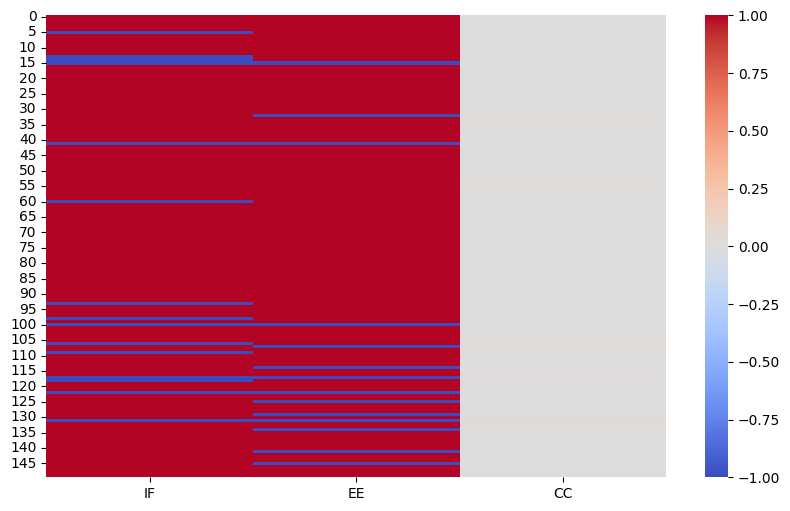

OUTLIER FOR IF: 15
OUTLIER FOR IF: 14
top 5 highest cook's dist:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
131  132            7.9           3.8            6.4           2.0   
53    54            5.5           2.3            4.0           1.3   
117  118            7.7           3.8            6.7           2.2   
106  107            4.9           2.5            4.5           1.7   
133  134            6.3           2.8            5.1           1.5   

             Species  IF  EE        CC  
131   Iris-virginica  -1  -1  0.047942  
53   Iris-versicolor   1   1  0.041902  
117   Iris-virginica  -1  -1  0.037389  
106   Iris-virginica  -1   1  0.035063  
133   Iris-virginica   1   1  0.033797  


In [110]:
#cook's dist
X=sm.add_constant(data_std)
y=np.random.rand(len(data))

ols_model=sm.OLS(y,X).fit()
influence=ols_model.get_influence()
cooks_distance=influence.cooks_distance[0]
data['CC']=cooks_distance

#heatmap
out_col=['IF','EE','CC']
out_data=data[out_col]
plt.figure(figsize=(10,6))
sns.heatmap(out_data,cmap='coolwarm',annot=False,cbar=True)
plt.show()


print("OUTLIER FOR IF:",len(data[data['IF']==-1]))
print("OUTLIER FOR IF:",len(data[data['EE']==-1]))
print("top 5 highest cook's dist:",data.nlargest(5,'CC'))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   IF  EE        CC  
0   1   1  0.000105  
1   1   1  0.001538  
2   1   1  0.000257  
3   1   1  0.000295  
4   1   1  0.008020  
SVM Accuracy: 1.0


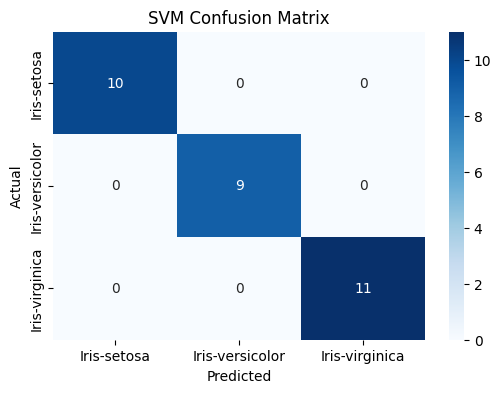

ValueError: could not convert string to float: 'Iris-setosa'

In [124]:
#svm and LR
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

print(data.head())

X = data.drop(columns=['Species'])  # Features (excluding the target column)
y = data['Species']  # Target variable

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Support Vector Machine (SVM) --------------------

# Initialize and train SVM model (for classification)
svm = SVC(kernel='linear')  # You can change the kernel to 'rbf' or 'poly' for different behavior
svm.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm.predict(X_test)

# Confusion Matrix and Accuracy for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Plot confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# -------------------- Linear Regression --------------------

# Initialize and train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = linear_reg.predict(X_test)

# Calculate the accuracy (for regression, we typically use R^2 score instead of accuracy)
r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression R^2 Score:", r2)

# -------------------- Linear Regression Graph --------------------

# Plotting the true values vs predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue')  # Plot actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [126]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset (Iris dataset as an example)
data = pd.read_csv('Iris.csv')
X = data.drop(columns=['Species'])  # Use the correct column names
y = data['Species']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ----------------- K-Means Clustering -----------------
# Define the number of clusters (k)
k = 3  # You can change this to the number of clusters you want

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model
kmeans.fit(X_scaled)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels to the dataset
X['Cluster'] = labels

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Visualizing the clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='x', label='Centroids')
plt.title("K-Means Clustering (2D Projection)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Optionally, you can check the inertia (sum of squared distances of samples to their closest cluster center)
print("Inertia:", kmeans.inertia_)

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [128]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
file_path = r"/mnt/c/Users/gowri/Downloads/groceries - groceries.csv"  # Change the path if needed
df = pd.read_csv(file_path)

# Preview dataset
print("Dataset Preview:\n", df.head())

# Convert transactions into lists (ignoring NaN values)
transactions = df.iloc[:, 1:].apply(lambda row: row.dropna().tolist(), axis=1)

# Convert transactions into a DataFrame with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:\n", rules)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/gowri/Downloads/groceries - groceries.csv'

In [130]:
#vertical
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset - assuming a vertical data format (1 and 0 values)
# Replace with the actual path to your dataset
data = pd.read_csv('ex.csv')

# Print data to inspect the structure
print("Data Overview:")
print(data.head())

# Make sure all data is in binary format (1 and 0)
# This can be done by converting non-zero values to 1 and leaving zeros as they are
data = data.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori Algorithm
# We are assuming the data is in a format where each column represents an item
# and each row represents a transaction (1 means item is purchased, 0 means it is not).

# Minimum support for itemsets, you can adjust this threshold
min_support = 0.2

# Running apriori to find frequent itemsets
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules from the frequent itemsets
min_threshold = 0.7  # Minimum lift value
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

# Print association rules
print("Association Rules:")
print(rules)

# Optionally, save the results to a CSV file
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
rules.to_csv('association_rules.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'ex.csv'